# Big Mart Sales Prediction

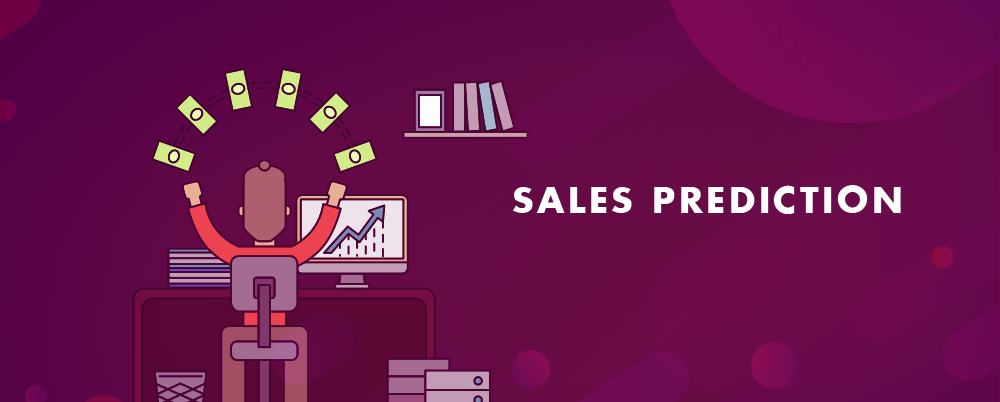

<b> Dataset - Sales data for the year 2013, for 1559 products across 10 stores in different cities. 

<b> Using this model, we understand how various properties of products and stores play a key role in increasing the overall sales.

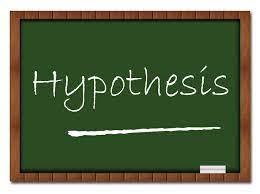

# Hypothesis based on Store characteristics:
- Store Type: Stores which are very big in size ought to have higher sales as people might prefer getting everything from one place, all in one go.

# Hypothesis based on Product characteristics:
- Product Visibility in a Store :
The location of the product in a store ought to impact sales. Products which are placed right at entrance or have a higher visibility will catch the eye of the customer quickly, rather than the products kept at the back that have a lower visibility.  
- Product Price:
The Product's price also heaviliy influences its sales.

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
#Reading files:

Train= pd.read_csv(r"C:\Users\aishm\OneDrive\Desktop\AishwaryaMishra_KrishnaTyagi_MokshaDoshi_Group10\Train.csv")
Test = pd.read_csv(r"C:\Users\aishm\OneDrive\Desktop\AishwaryaMishra_KrishnaTyagi_MokshaDoshi_Group10\Test.csv")

In [3]:
Train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
final_data = pd.DataFrame(Test[['Item_Identifier','Outlet_Identifier']],columns = ['Item_Identifier','Outlet_Identifier'])

In [5]:
# Combining both Train and Test datasets into one single dataset to perform Pre-processing
Train['source'] = 'Train'
Test['source'] = 'Test'
data = pd.concat([Train, Test],ignore_index=True)
print (Train.shape, Test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [6]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train


In [7]:
#data.tail()

In [8]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [9]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


--> In the data set we can see that the column 'Item_Visibility' has a minimum value equalling 0, which is not physically possible because placing a product in a store guarantees some kind of visibility at least. 

--> Coverting the Outlet_Establishment_Years value from the actual year to how long it's been since the store was established, would show a clearer impact on sales. 

### Univariate Analysis

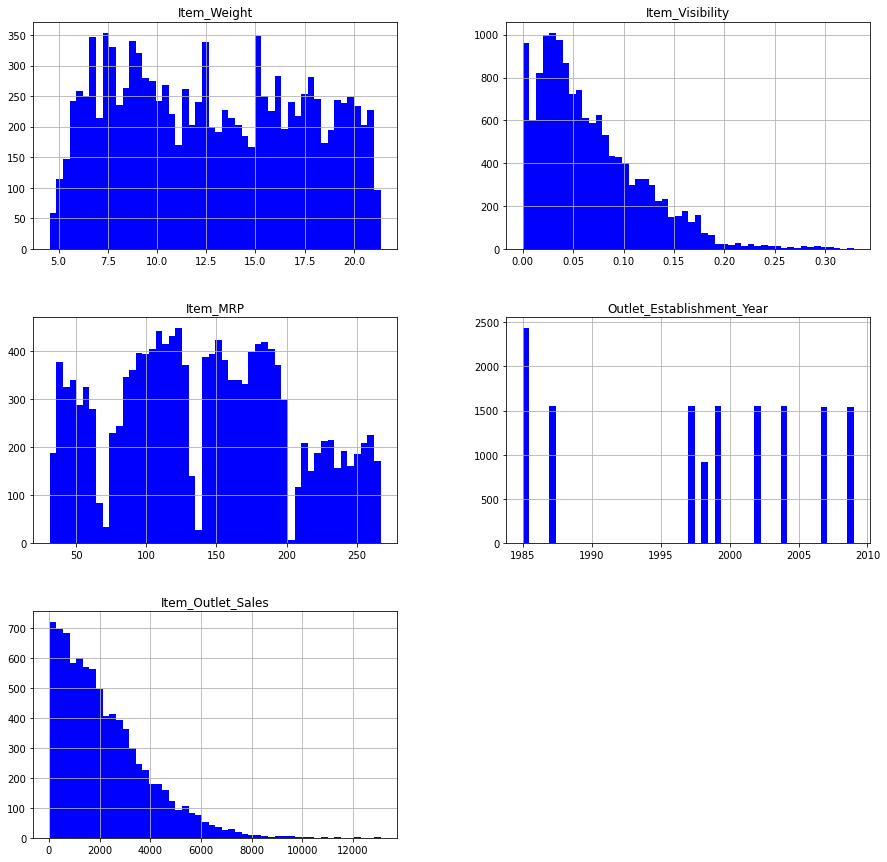

In [10]:
import matplotlib.pyplot as plt
data.hist(bins = 50, figsize = (15,15), color = "blue")
plt.show()

C:\Users\aishm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


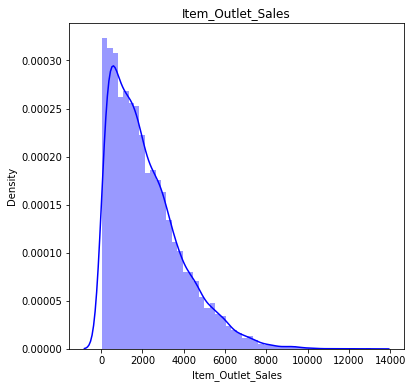

In [11]:
# Plotting a distribution plot for Item_Outlet_Sales

plt.figure(figsize = (6,6))
sns.distplot(data['Item_Outlet_Sales'], color = 'blue')
plt.title( "Item_Outlet_Sales" )
plt.show()

The value of the Item_Outlet_Sales is skewed towards the right, with a long tail. This implies that the mean should be greater than the median.

In [12]:
# Checking the count of null values in the dataset
print (data.apply(lambda x:sum(x.isnull())))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64


In [13]:
# Checking the count of unique values in our dataset
data.apply(lambda x:len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [14]:
# Filtering all categorical variables
categorical_columns = [y for y in data.dtypes.index if data.dtypes[y] == 'object']
# Excluding all Identification columns and the source column:
categorical_columns = [y for y in categorical_columns if y not in ['Item_Identifier','Outlet_Identifier','source']]

# Printing the frequency of all categories
for col in categorical_columns:
    print ('\nFrequency of Categories for the variable %s' %col)
    print (data[col].value_counts())


Frequency of Categories for the variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for the variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for the variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for the variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_T

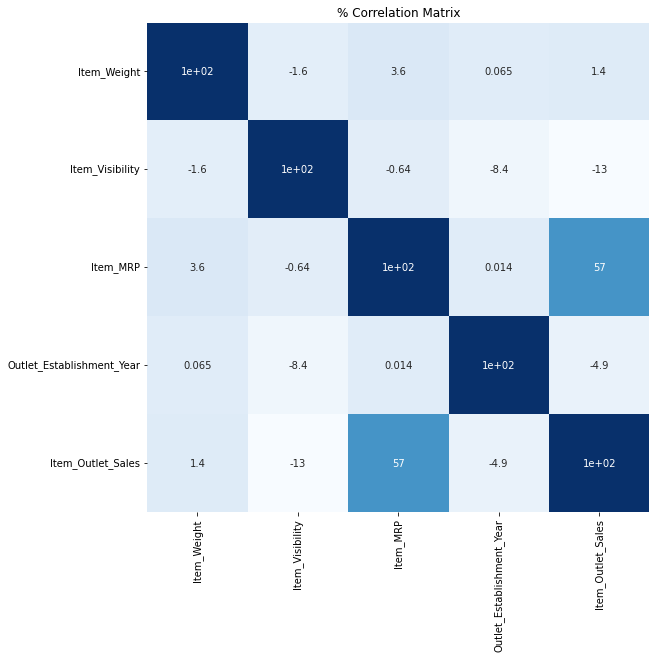

In [15]:
#Correlation matrix

plt.figure(figsize = (9,9))
sns.heatmap(cbar = False, annot = True, data = data.corr()*100, cmap = 'Blues')
plt.title('% Correlation Matrix')
plt.show()

--> After observing the correlation plot above, we can see a few highly-correlated independent variables in our data. For example: A high degree of correlation between the features: "Item_MRP" and "Item_Outlet_Sales".

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Type'>

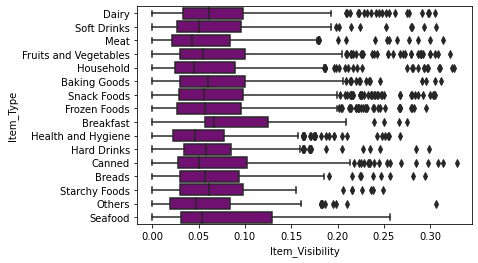

In [16]:
sns.boxplot(x = 'Item_Visibility',y = 'Item_Type',color = 'purple',data = data)

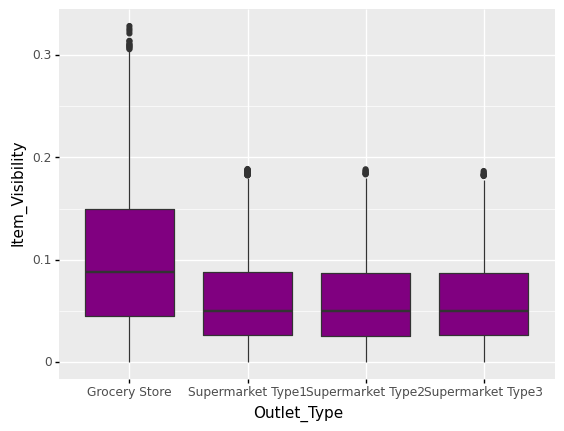

<ggplot: (143896416681)>

In [17]:
ggplot(data,aes('Outlet_Type', 'Item_Visibility'))+geom_boxplot (fill = "purple" ) 

C:\Users\aishm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


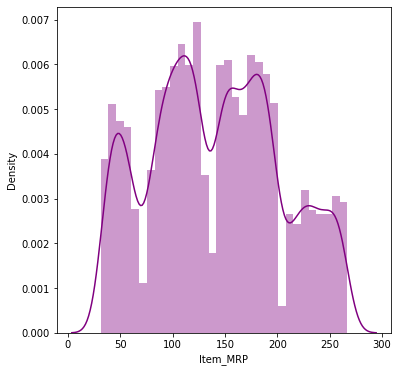

In [18]:
plt.figure(figsize=(6,6))
sns.distplot(data['Item_MRP'],color='purple')
plt.show()

## Bivariate Analysis:

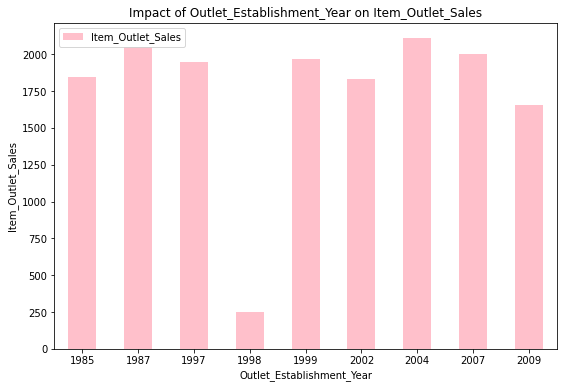

In [19]:
Outlet_Establishment_Year_pivot= \
Train.pivot_table(index = 'Outlet_Establishment_Year',values = "Item_Outlet_Sales",aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind= 'bar',color='pink', figsize=(9,6))
plt.xlabel( "Outlet_Establishment_Year")
plt.ylabel( "Item_Outlet_Sales")
plt.title( "Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

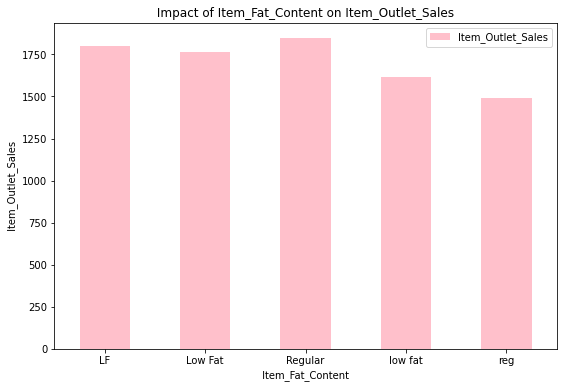

In [20]:
Item_Fat_Content_pivot=\
Train.pivot_table(index = 'Item_Fat_Content',values = "Item_Outlet_Sales",aggfunc = np.median)
Item_Fat_Content_pivot.plot(kind = 'bar',color = 'pink', figsize = (9,6))
plt.xlabel(" Item_Fat_Content ")
plt.ylabel(" Item_Outlet_Sales ")
plt.title(" Impact of Item_Fat_Content on Item_Outlet_Sales ")
plt.xticks(rotation = 0)
plt.show()

C:\Users\aishm\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_boxplot : Removed 5681 rows containing non-finite values.


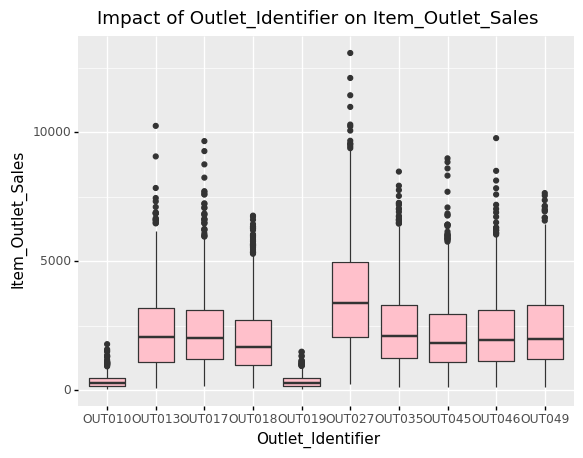

<ggplot: (143896204548)>

In [21]:
ggplot( data,aes( 'Outlet_Identifier', 'Item_Outlet_Sales')) + geom_boxplot(fill= "pink") +ggtitle('Impact of Outlet_Identifier on Item_Outlet_Sales')

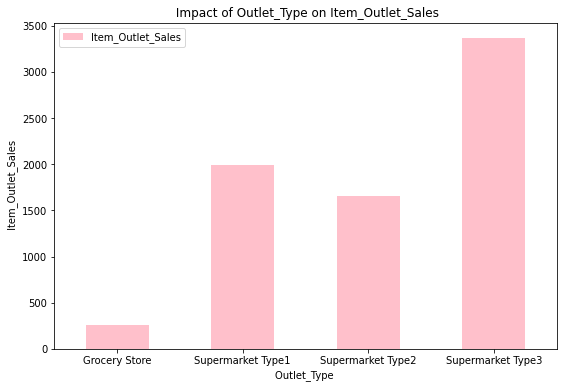

In [22]:
Outlet_Type_pivot=\
Train.pivot_table(index ='Outlet_Type', values ="Item_Outlet_Sales",aggfunc = np.median)
Outlet_Type_pivot.plot(kind = 'bar', color = 'pink', figsize = (9,6))
plt.xlabel("Outlet_Type ")
plt.ylabel(" Item_Outlet_Sales")
plt.title( " Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation = 0)
plt.show()

C:\Users\aishm\anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 5681 rows containing missing values.


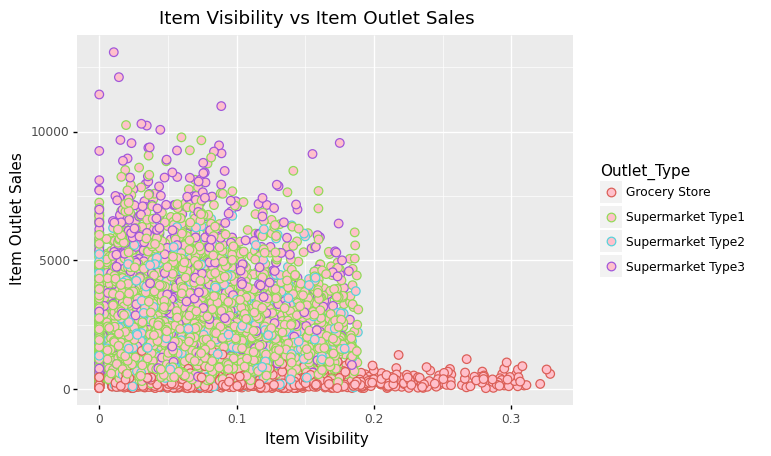

<ggplot: (143896804551)>

In [23]:
ggplot( data,aes(x= 'Item_Visibility', y = 'Item_Outlet_Sales', color = 'Outlet_Type', )) +geom_point(size = 3, fill = "pink") + xlab('Item Visibility') +ylab('Item Outlet Sales') +ggtitle('Item Visibility vs Item Outlet Sales')

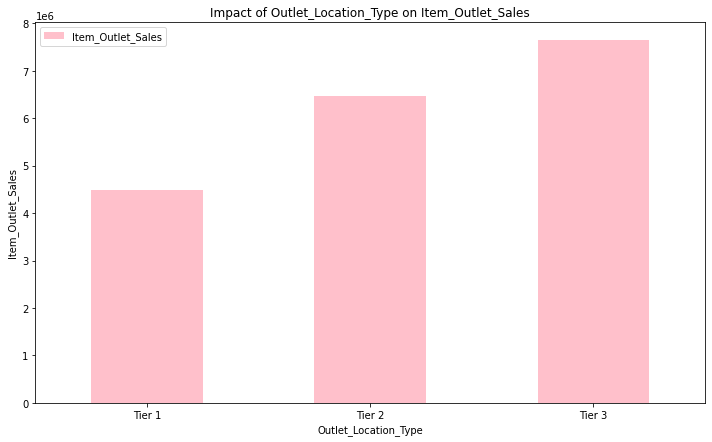

In [24]:
Outlet_Establishment_Year_pivot = \
Train.pivot_table(index='Outlet_Location_Type', values=["Item_Outlet_Sales", "Outlet_Size"], aggfunc=np.sum)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='pink',figsize=(12,7))
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

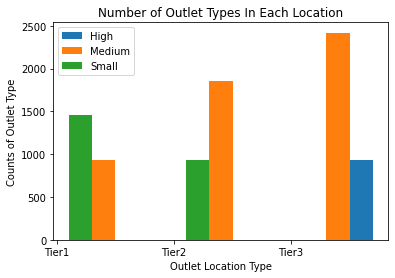

In [25]:
import matplotlib.pyplot as plt 

X = ['Tier1', 'Tier2', 'Tier3']
High = [0, 0, 933]
Medium = [931,1856,2419]
Small = [1459,931,0]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis + 0.6, High, 0.2, label = 'High')
plt.bar(X_axis + 0.4, Medium, 0.2, label = 'Medium')
plt.bar(X_axis + 0.2, Small, 0.2, label = 'Small') 


plt.xticks(X_axis, X)
plt.xlabel("Outlet Location Type")
plt.ylabel("Counts of Outlet Type")
plt.title("Number of Outlet Types In Each Location")
plt.legend()
plt.show()

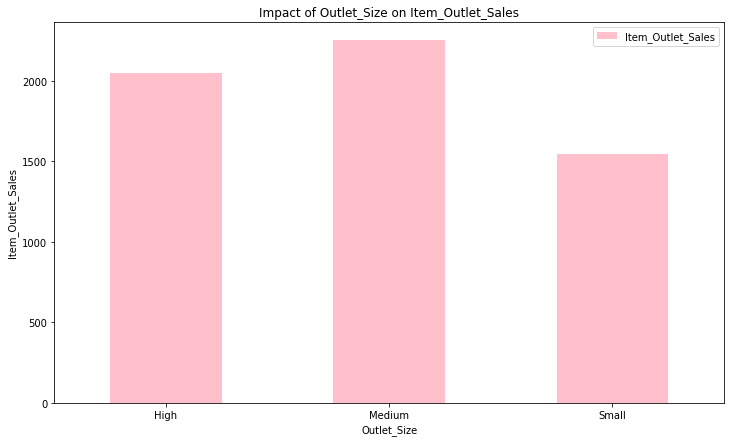

In [26]:
Outlet_Establishment_Year_pivot = \
Train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='pink',figsize=(12,7))
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

# Data-Preprocessing

In [27]:
# Determining the average weight of item:
avg_weight_of_item = data.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')

# Getting a boolean variable for specifying missing Item_Weight values
bool_missing_value = data['Item_Weight'].isnull() 

# Inputting the data and checking for missing values before and after inputation for confirmation purposes
print ('Orignal missing values: %d'% sum(bool_missing_value))

data.loc[bool_missing_value,'Item_Weight'] = data.loc[bool_missing_value,'Item_Identifier'].apply(lambda x: avg_weight_of_item.loc[x])
print ('Final missing values: %d'% sum(data['Item_Weight'].isnull()))

Orignal missing values: 2439
Final missing values: 0


Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal missing values: 4016
Final missing values: 0


[]

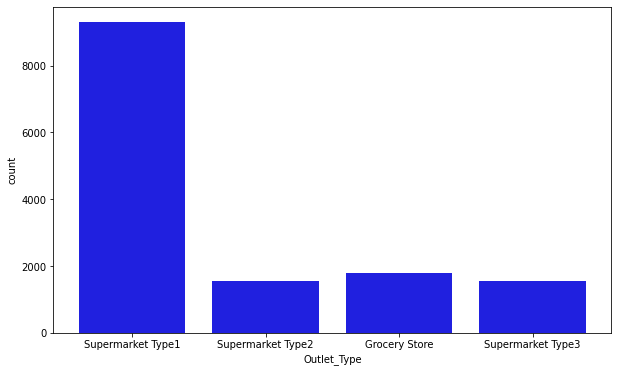

In [28]:
from scipy.stats import mode

# Determing the mode for each Outlet_Type
mode_of_outlet_size = data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x:mode(x).mode[0]) )
print ('Mode for each Outlet_Type:')
print (mode_of_outlet_size)

# Getting a boolean variable for specifying missing Item_Weight values
bool_missing_value = data['Outlet_Size'].isnull() 

# Inputting the data and checking for missing values before and after inputation for confirmation purposes
print ('\nOrignal missing values: %d'% sum(bool_missing_value))
data.loc[bool_missing_value,'Outlet_Size'] = data.loc[bool_missing_value,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])
print ('Final missing values: %d' %sum(data['Outlet_Size'].isnull()))
plt.figure(figsize = (10,6))
sns.countplot(data = data, x = 'Outlet_Type', color = 'blue')
plt.plot()

In [29]:
# Determining the average visibility of a product
avg_visibility = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

# Inputting a value of 0 with the mean visibility of that product:
bool_missing_value = (data['Item_Visibility'] == 0)

print ('Number of null values initially: %d'%sum(bool_missing_value))
data.loc[bool_missing_value,'Item_Visibility'] = data.loc[bool_missing_value,'Item_Identifier'].apply(lambda x: avg_visibility.loc[x])
print ('Number of null values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of null values initially: 879
Number of null values after modification: 0


In [30]:
# Determining another variable using the 'means ratio'
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/avg_visibility.loc[x['Item_Identifier']], axis=1)
print (data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


In [31]:
# Getting the first two characters of ID:
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x:x[0:2])

# Renaming them to better suited categories:
data['Item_Type_Combined']=data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

[]

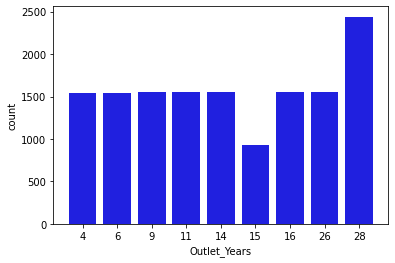

In [32]:
# Determining the number of Years since establishment:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
sns.countplot(data = data, x = 'Outlet_Years', color = 'blue')
plt.plot()

In [33]:
# Properly categorizing all the Low-fat data and Regular fat data:
print ('Original Categories of fat content:')
print (data['Item_Fat_Content'].value_counts())

print ('\nModified Categories of fat content:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
print (data['Item_Fat_Content'].value_counts())

Original Categories of fat content:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories of fat content:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [34]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Visibility_MeanRatio,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train,0.931078,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train,0.933420,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train,0.960069,Food,14
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Train,1.000000,Food,15
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train,1.000000,Non-Consumable,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,Test,0.874729,Food,16
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,Test,0.878292,Food,4
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,Test,1.162245,Non-Consumable,11
14202,FDJ26,15.30,Regular,0.088380,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,Test,1.000000,Food,6


Low Fat        6499
Regular        5019
Non-Edibles    2686
Name: Item_Fat_Content, dtype: int64


[]

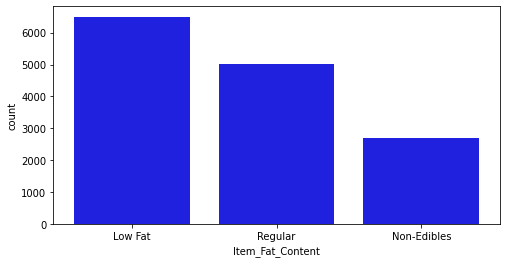

In [35]:
# Categorizing all items that are non-consumable into a separate category in the Item_Fat_Content column:
data.loc[data['Item_Type_Combined'] == 'Non-Consumable','Item_Fat_Content'] = "Non-Edibles"

print (data['Item_Fat_Content'].value_counts())
plt.figure(figsize = (8,4))
sns.countplot(data = data, x ='Item_Fat_Content', color = 'blue')
plt.plot()

In [36]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet_Identifier']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [37]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Visibility_MeanRatio,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,Train,0.931078,1,14
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,Train,0.933420,0,4
2,FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,Train,0.960069,1,14
3,FDX07,19.20,2,0.017834,Fruits and Vegetables,182.0950,0,1998,2,2,0,732.3800,Train,1.000000,1,15
4,NCD19,8.93,1,0.009780,Household,53.8614,1,1987,0,2,1,994.7052,Train,1.000000,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,2,0.013496,Snack Foods,141.3154,8,1997,2,0,1,NaN,Test,0.874729,1,16
14200,FDD47,7.60,2,0.142991,Starchy Foods,169.1448,3,2009,1,2,2,NaN,Test,0.878292,1,4
14201,NCO17,10.00,1,0.073529,Health and Hygiene,118.7440,7,2002,2,1,1,NaN,Test,1.162245,2,11
14202,FDJ26,15.30,2,0.088380,Canned,214.6218,2,2007,2,1,1,NaN,Test,1.000000,1,6


In [38]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
source                        object
Item_Visibility_MeanRatio    float64
Item_Type_Combined             int32
Outlet_Years                   int64
dtype: object

In [39]:
# Dropping columns that have been converted to better titled columns:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [40]:
# Dropping the Identification columns:
data['Item_Weight'] = data['Item_Weight'].astype("float64")
data.drop(['Item_Identifier'],axis = 1, inplace = True)

In [41]:
# Re-Dividing the datasets into the original testing and training sets:
Train = data.loc[data['source'] == "Train"]
Test  = data.loc[data['source'] == "Test"]

# Dropping all other unnecessary columns:
Test.drop(['Item_Outlet_Sales','source'],axis = 1,inplace = True)
Train.drop(['source'],axis = 1,inplace = True)

C:\Users\aishm\AppData\Local\Temp/ipykernel_32852/407441907.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\aishm\AppData\Local\Temp/ipykernel_32852/407441907.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


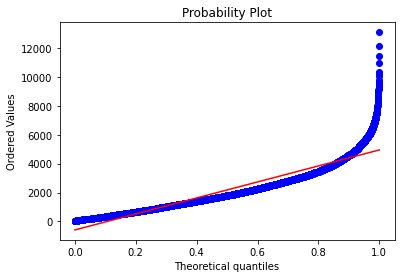

In [42]:
# Plotting to observe whether the assumptions based on regression remain validated 

import matplotlib.pyplot as plt
import scipy.stats as stats

quantile = Train['Item_Outlet_Sales']

stats.probplot(quantile, dist = "uniform", fit = True, plot = plt)
plt.show()

# The red line gives the best-fit for our data
## the line is almost linear except for the end points 

# Lets build some Models

In [43]:
X = Train.drop(['Item_Outlet_Sales'],axis = 1)
Y = Train[['Item_Outlet_Sales']]

In [44]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(X)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,Y, test_size = 0.3, random_state=0)

In [46]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(5966, 11)
(5966, 1)
(2557, 11)
(2557, 1)


## 1.) Linear Regression

Assumed our model to be linear.
Used linear regression in statsmodels.
Added a column that would act as the intercept. 

In [47]:
import statsmodels.api as sm # Statistical data exploration.

X_constant = sm.add_constant(X)# Added a column of ones to  array.
lin_reg = sm.OLS(Y,X_constant).fit()  # Fitting the linear model using Ordinary Least Squares.
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     853.8
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        13:22:12   Log-Likelihood:                -72354.
No. Observations:                8523   AIC:                         1.447e+05
Df Residuals:                    8511   BIC:                         1.448e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       472.7556    124.674      3.792      0.000     228.364     717.147
Item_Weight                  -1.2587      2.755     -0.457      0.648      -6.658       4.141
Item_Fat_Content             28.2143     14.516      1.944      0.052      -0.241      56.669
Item_Visibility            -757.5401    267.254     -2.835      0.005   -1281.423    -233.657
Item_MRP                     15.5040      0.205     75.626      0.000      15.102      15.906
Outlet_Identifier            21.4698      9.326      2.302      0.021       3.189      39.751
Outlet_Size                  69.2010     26.499      2.611      0.009      17.256     121.146
Outlet_Location_Type        -73.5982     36.688     -2.006      0.045    -145.516      -1.681
Outlet_Type                 662.3957     27.569     24.027      0.000     608.354     716.438
Item_Visibility_MeanRatio -1478.7950     76.219    -19.402      0.000   -1628.203   -1329.387
Item_Type_Combined          -35.6162     24.987     -1.425      0.154     -84.596      13.364
Outlet_Years                 17.2583      1.956      8.825      0.000      13.425      21.092
==============================================================================
Omnibus:                      928.852   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2081.654
Skew:                           0.666   Prob(JB):                         0.00
Kurtosis:                       5.021   Cond. No.                     3.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared is a metric that signifes how well the linear regression model fits onto your data. This statistic indicates the percentage of variance in the dependent variable, that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.
A larger value of R2, indicates a better regression model to fit your observations. 

The R2 value calculated above is low but the independent variables can be seen as being statically significant.

In [48]:
from sklearn.linear_model import LinearRegression
lin_regression = LinearRegression(normalize = True)
lin_regression.fit(X_train, y_train)
sales_prediction = lin_regression.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error
linear_mean_squared_error = mean_squared_error(y_test, sales_prediction)
linear_root_mean_squared_error = np.sqrt(linear_mean_squared_error)
linear_root_mean_squared_error

1201.1611519106073

In [50]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [51]:
from sklearn.model_selection import cross_val_score
linear_scores = cross_val_score(lin_regression, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)

linear_root_mean_squared_error_scores = np.sqrt(-linear_scores)
display_scores(linear_root_mean_squared_error_scores )
LR_cv_score = linear_root_mean_squared_error_scores .mean()
LR_cv_score

Scores: [1182.99123405 1229.82875566 1165.27936895 1158.14867873 1162.24752549
 1132.19005881 1144.31347296 1114.1466052  1243.71215947 1148.50595205]
Mean: 1168.1363811369272
Standard deviation: 38.78250640966057


1168.1363811369272

## 2.) Ridge Regression Model

In [52]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
Ridge_regression = Ridge(alpha = 0.01, normalize = True)
Ridge_regression.fit(X_train, y_train)
sales_prediction = Ridge_regression.predict(X_test)

In [53]:
Ridge_regression_mean_squared_error = mean_squared_error(y_test, sales_prediction)
Ridge_regression_root_mean_squared_error = np.sqrt(Ridge_regression_mean_squared_error)
Ridge_regression_root_mean_squared_error

1201.8644380481926

In [54]:
from sklearn.model_selection import cross_val_score
Ridge_Regression_scores = cross_val_score(Ridge_regression, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)

Ridge_root_mean_squared_error_scores = np.sqrt(-Ridge_Regression_scores)
display_scores(Ridge_root_mean_squared_error_scores)
RR_cv_score = Ridge_root_mean_squared_error_scores.mean()
RR_cv_score

Scores: [1184.05191202 1228.67691477 1164.83986335 1158.3566799  1161.98841101
 1132.04560132 1144.66146139 1114.60592841 1244.41541675 1147.82026719]
Mean: 1168.1462456117656
Standard deviation: 38.74677774903086


1168.1462456117656

## 3.) Decision Tree

In [55]:
from sklearn.tree import DecisionTreeRegressor
Decision_tree_regression = DecisionTreeRegressor(max_depth = 25, min_samples_leaf = 100)
Decision_tree_regression.fit(X_train, y_train)
sales_prediction = Decision_tree_regression.predict(X_test)

In [56]:
Decision_tree_mean_squared_error = mean_squared_error(y_test, sales_prediction)
Decision_tree_root_mean_squared_error = np.sqrt(Decision_tree_mean_squared_error)
Decision_tree_root_mean_squared_error

1125.6409817385334

In [57]:
Decision_tree_scores = cross_val_score(Decision_tree_regression, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
Decision_tree_scores = np.sqrt(-Decision_tree_scores)
display_scores(Decision_tree_scores)

Scores: [1079.79353179 1134.31790244 1111.98782888 1044.23632549 1097.10953114
 1100.00264445 1077.79095878 1050.99399272 1145.50684011 1079.57570113]
Mean: 1092.131525690678
Standard deviation: 31.00225137423238


In [58]:
# Optimizing the hyperparameters
from sklearn.model_selection import GridSearchCV

parameter_grid = [{'max_depth': [6, 12, 18, 24], 'min_samples_leaf': [50, 100, 150]}]
Decision_tree_regression = DecisionTreeRegressor()
grid_search = GridSearchCV(Decision_tree_regression, parameter_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [6, 12, 18, 24],
                          'min_samples_leaf': [50, 100, 150]}],
             scoring='neg_mean_squared_error')

In [59]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 50}

In [60]:
grid_tree_regression = DecisionTreeRegressor(max_depth = 6, min_samples_leaf = 50)
grid_tree_regression.fit(X_train, y_train)
sales_prediction = grid_tree_regression.predict(X_test)
Decision_tree_mean_squared_error = mean_squared_error(y_test, sales_prediction)
Decision_tree_root_mean_squared_error = np.sqrt(Decision_tree_mean_squared_error)
Decision_tree_root_mean_squared_error

1116.538807842092

In [61]:
Scores_DR = cross_val_score(grid_tree_regression, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
Decision_tree_root_mean_squared_error_Scores = np.sqrt(-Scores_DR)
display_scores(Decision_tree_root_mean_squared_error_Scores)
DT_cv_score = Decision_tree_root_mean_squared_error_Scores.mean()
DT_cv_score

Scores: [1058.91500421 1138.51073844 1109.88100258 1045.16657787 1076.11934508
 1076.41459131 1061.90557964 1062.22293678 1131.58138887 1051.70317141]
Mean: 1081.2420336192201
Standard deviation: 31.767271753357395


1081.2420336192201

<AxesSubplot:title={'center':"Features' Importance"}>

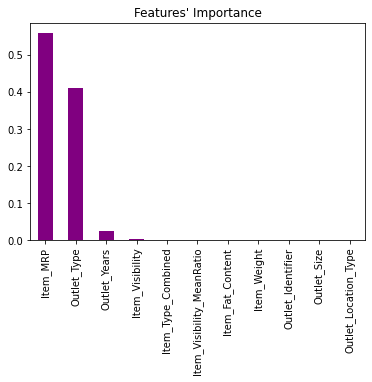

In [62]:
DR_Feature_imp = pd.Series(grid_tree_regression.feature_importances_, X.columns).sort_values(ascending = False)
DR_Feature_imp.plot(kind = 'bar', title = "Features' Importance", color = 'purple')

## 4.) Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor
Random_forest_regression = RandomForestRegressor(n_estimators = 100, max_depth = 6, min_samples_leaf = 60, n_jobs = 3)
Random_forest_regression.fit(X_train, y_train.values.ravel())
sales_prediction = Random_forest_regression.predict(X_test)

In [64]:
Random_forest_mean_squared_error = mean_squared_error(y_test, sales_prediction)
Random_forest_root_mean_squared_error = np.sqrt(Random_forest_mean_squared_error)
Random_forest_root_mean_squared_error

1112.232389979123

In [65]:
RF_Scores = cross_val_score(Random_forest_regression, X_train, y_train.values.ravel(), scoring = "neg_mean_squared_error", cv = 10)
Random_forest_root_mean_squared_error_Scores = np.sqrt(-RF_Scores)
display_scores(Random_forest_root_mean_squared_error_Scores)

Scores: [1063.64341059 1120.33280252 1090.20570628 1029.37161116 1078.91462347
 1066.47652889 1048.7153313  1042.19890909 1133.57283977 1050.59437334]
Mean: 1072.4026136422603
Standard deviation: 32.110614602023695


In [66]:
# Optimizing the Hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = [{'bootstrap': [False,True], 'n_estimators': [100,200,300], 'max_depth': [3,4,6,7], 'min_samples_leaf':[50,100]}]
Random_forest_regression = RandomForestRegressor()
grid_search = GridSearchCV(Random_forest_regression, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False, True], 'max_depth': [3, 4, 6, 7],
                          'min_samples_leaf': [50, 100],
                          'n_estimators': [100, 200, 300]}],
             scoring='neg_mean_squared_error')

In [67]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'min_samples_leaf': 50,
 'n_estimators': 200}

In [68]:
Random_Forest_Regression = RandomForestRegressor(bootstrap = True, n_estimators = 200, max_depth = 6, min_samples_leaf = 50)
Random_Forest_Regression.fit(X_train, y_train.values.ravel())
sales_prediction = Random_Forest_Regression.predict(X_test)
Random_forest_mean_squared_error = mean_squared_error(y_test, sales_prediction)
Random_forest_root_mean_squared_error = np.sqrt(Random_forest_mean_squared_error)
Random_forest_root_mean_squared_error

1111.1402547143323

In [69]:
RF_scores = cross_val_score(Random_Forest_Regression, X_train, y_train.values.ravel(),scoring="neg_mean_squared_error", cv=10)
Random_forest_root_mean_squared_error_scores = np.sqrt(-RF_scores)
display_scores(Random_forest_root_mean_squared_error_scores)
RF_cv_score = Random_forest_root_mean_squared_error_scores.mean()
RF_cv_score

Scores: [1062.4414666  1123.13588714 1089.19222906 1031.92354385 1076.5741987
 1065.13670342 1047.15201629 1041.15151589 1132.52537985 1049.16980152]
Mean: 1071.840274231571
Standard deviation: 32.294432087010435


1071.840274231571

<AxesSubplot:title={'center':'Feature Importances'}>

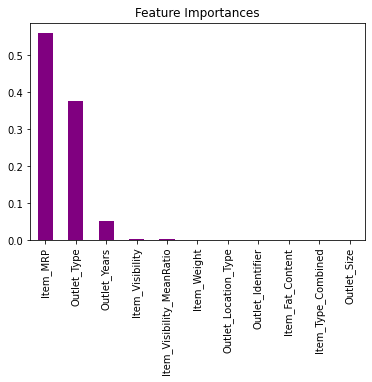

In [70]:
RF_Feature_Imp = pd.Series(Random_Forest_Regression.feature_importances_, X.columns).sort_values(ascending = False)
RF_Feature_Imp.plot(kind = 'bar', title = 'Feature Importances', color = 'purple')

## 5.) XGBoost

In [71]:
import xgboost 
from xgboost import XGBRegressor
The_Model = XGBRegressor(n_estimators = 500, learning_rate = 0.05, max_depth = 2)
The_Model.fit(X_train, y_train, verbose = False)

C:\Users\aishm\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [72]:
# Making predictions
from sklearn import metrics
prediction = The_Model.predict(X_test)
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(prediction, y_test)))
print("Root Mean Squared Error : %.4g" % np.sqrt(metrics.mean_squared_error(prediction, y_test)))

Mean Absolute Error : 785.002621329257
Root Mean Squared Error : 1107


In [73]:
XG_Scores = cross_val_score(The_Model, X_train, y_train.values.ravel(), scoring="neg_mean_squared_error", cv = 10)
XG_Root_mean_squared_error_scores = np.sqrt(-XG_Scores)
display_scores(XG_Root_mean_squared_error_scores)

Scores: [1081.26029457 1126.84746675 1098.48310849 1036.51957759 1069.898244
 1052.5894308  1056.75509024 1067.42885184 1144.53609879 1047.0009799 ]
Mean: 1078.1319142971363
Standard deviation: 33.4651105222234


In [74]:
# Optimizing the Hyperparameters
from sklearn.model_selection import GridSearchCV
parameter_search = {
 'max_depth':range(2,3,6),
 'n_estimators':[300,500,1000],  
 'learning_rate':[0.001,0.01, 0.05,0.1],
 'gamma' :[i/10.0 for i in range(0,5)],
 'min_child_weight': [6,8,10,12]}

TheModel = GridSearchCV(estimator = XGBRegressor(),
                       param_grid = parameter_search,
                       cv = 5, n_jobs = -1)

TheModel.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                 

In [75]:
# Deciding which Hyperparameters are important
print(TheModel.best_score_)
print(TheModel.best_params_)

0.5970763443543852
{'gamma': 0.0, 'learning_rate': 0.01, 'max_depth': 2, 'min_child_weight': 12, 'n_estimators': 1000}


In [76]:
# Making Predictions
The_Model= XGBRegressor(n_estimators = 1000, learning_rate = 0.01, max_depth = 2, min_child_weight = 12, gamma = 0.0)
The_Model.fit(X_train, y_train)
prediction = The_Model.predict(X_test)
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(prediction, y_test)))
print("Root Mean Squared Error : %.4g" % np.sqrt(metrics.mean_squared_error(prediction, y_test)))

Mean Absolute Error : 782.2017729458704
Root Mean Squared Error : 1103


In [77]:
XG_Scores = cross_val_score(The_Model, X_train, y_train.values.ravel(), scoring = "neg_mean_squared_error", cv = 10)
xg_scores = np.sqrt(-XG_Scores)
display_scores(xg_scores)
XG_cv_score= xg_scores.mean()
XG_cv_score

Scores: [1071.0791198  1126.63840894 1097.82453694 1029.94697442 1064.75653939
 1047.74390552 1046.14389863 1044.97807583 1143.70847174 1044.69140811]
Mean: 1071.7511339311145
Standard deviation: 36.53540801989688


1071.7511339311145

<AxesSubplot:title={'center':'Feature Importances'}>

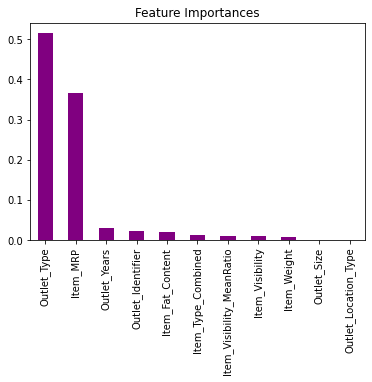

In [78]:
XG_Feature_Imp = pd.Series(The_Model.feature_importances_, X.columns).sort_values(ascending = False)
XG_Feature_Imp.plot(kind = 'bar', title = 'Feature Importances', color = 'purple')

Overfitting in XGBoost can be controlled by:
Directly controlling the model complexity which includes max_depth, min_child_weight and gamma. This is done through hyperparameter tuning.

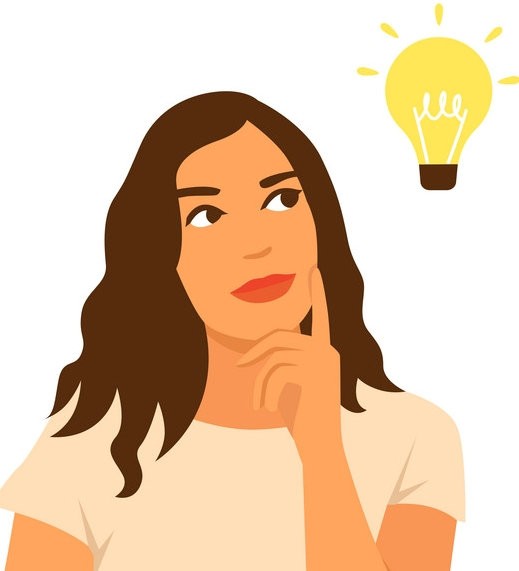

# Choosing the final Model

In [79]:
results = []
results.append(LR_cv_score)
results.append(RR_cv_score)
results.append(DT_cv_score)
results.append(RF_cv_score)
results.append(XG_cv_score)
print (results)

names = ['linear_Model', 'Ridge', 'Decision_Tree', 'Random_Forest', 'XGBoost']
print (names)

[1168.1363811369272, 1168.1462456117656, 1081.2420336192201, 1071.840274231571, 1071.7511339311145]
['linear_Model', 'Ridge', 'Decision_Tree', 'Random_Forest', 'XGBoost']


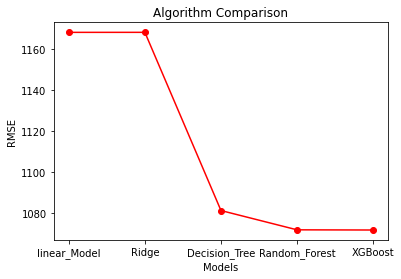

In [80]:
#Plotting RMSE for every algorithm
fig = plt.figure()
plt.plot(names,results,color = 'Red', marker = 'o')
plt.title('Algorithm Comparison')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()

# Evaluating the best suited Classifier's (XGBoost) performance on the test data

In [81]:
Test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_MeanRatio,Item_Type_Combined,Outlet_Years
8523,20.750,0,0.007565,107.8622,9,1,0,1,1.029192,1,14
8524,8.300,2,0.038428,87.3198,2,2,1,1,1.130311,1,6
8525,14.600,1,0.099575,241.7538,0,2,2,0,1.735215,2,15
8526,7.315,0,0.015388,155.0340,2,2,1,1,1.291577,1,6
8527,13.600,2,0.118599,234.2300,5,1,2,3,0.917824,1,28
...,...,...,...,...,...,...,...,...,...,...,...
14199,10.500,2,0.013496,141.3154,8,2,0,1,0.874729,1,16
14200,7.600,2,0.142991,169.1448,3,1,2,2,0.878292,1,4
14201,10.000,1,0.073529,118.7440,7,2,1,1,1.162245,2,11
14202,15.300,2,0.088380,214.6218,2,2,1,1,1.000000,1,6


In [82]:
data_test = sc_x.fit_transform(Test) #sc_x--Standard scaler

In [83]:
y_test_prediction = TheModel.predict(data_test)#Predicting sales using XGBoost model

In [84]:
y_test_prediction

array([1557.8245, 1406.6729,  690.5333, ..., 1919.7377, 3666.886 ,
       1340.5193], dtype=float32)

In [85]:
sample = pd.DataFrame(final_data)

In [86]:
sample['Item_Outlet_Sales'] = y_test_prediction

In [87]:
sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1557.824463
1,FDW14,OUT017,1406.672852
2,NCN55,OUT010,690.533325
3,FDQ58,OUT017,2414.838379
4,FDY38,OUT027,5780.382324
...,...,...,...
5676,FDB58,OUT046,2194.154297
5677,FDD47,OUT018,2498.532959
5678,NCO17,OUT045,1919.737671
5679,FDJ26,OUT017,3666.885986


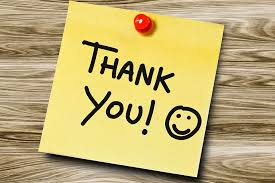